# Featurization and Model Tuning Project

**Data Description:**
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).

**Domain:**
Cement manufacturing

**Context:**
Concrete is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.

# 1. Deliverable -1 (Exploratory data quality report reflecting the following)

In [1]:
# Import required libraries
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Load the dataset
#reading the CSV file into pandas dataframe
concrete_df=pd.read_csv('concrete.csv')

In [3]:
#Check top few records of the dataset
concrete_df.head(50)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.
* There are few values of ash, superplastic etc. which has a value 0.0 - this is possible and hence cannot be considered as missing values

In [4]:
#Check the last few records of the dataset
concrete_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


## a. Univariate analysis

### i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [5]:
#To show the detailed summary 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type.
* Also,there are no null values in the data.

In [6]:
#To get the shape 
concrete_df.shape

(1030, 9)

* There are 1030 rows and 9 columns.

In [7]:
#To get the columns name
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

* It gives the column names of the dataset.

In [8]:
#Analyze the distribution of the dataset
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* It gives the descriptive statistics (mean, percentiles, min, max, standard deviation) and count of the columns of the dataset.
* The minimum value of slag, ash and superplastic is 0.00, which is a valid value and cannot be considered as missing value

##### Description of independent attributes

#### Range of values observed

In [9]:
#Python function to print Range of Values
def rangeOfValues(column):
    print('Range of values: ', concrete_df[column].max()-concrete_df[column].min())

#### Central values

In [10]:
#Python function to print Central values - min, max, mean, median, standard deviation
def centralValues(column):
    print('Minimum age: ', concrete_df[column].min())
    print('Maximum age: ',concrete_df[column].max())
    print('Mean value: ', concrete_df[column].mean())
    print('Median value: ',concrete_df[column].median())
    print('Standard deviation: ', concrete_df[column].std())

#### Quartiles

In [11]:
#Python function to print Q1, Q3 and Interquartile ranges
# Import stats from scipy
from scipy import stats
def quartile(column):
    Q1=concrete_df[column].quantile(q=0.25)
    Q3=concrete_df[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(concrete_df[column]))

#### Outlier detection from Interquartile range (IQR) in original data

In [12]:
#Python function to detect outliers
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
def outliers(column):
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in cement: ', L_outliers)
    print('Upper outliers in cement: ', U_outliers)
    print('Number of outliers in cement upper : ', concrete_df[concrete_df[column]>U_outliers][column].count())
    print('Number of outliers in cement lower : ', concrete_df[concrete_df[column]<L_outliers][column].count())
    print('% of Outlier in cement upper: ',round(concrete_df[concrete_df[column]>U_outliers][column].count()*100/len(concrete_df)), '%')
    print('% of Outlier in cement lower: ',round(concrete_df[concrete_df[column]<L_outliers][column].count()*100/len(concrete_df)), '%')

### Cement

In [13]:
rangeOfValues('cement')
centralValues('cement')
quartile('cement')

Range of values:  438.0
Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536
1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


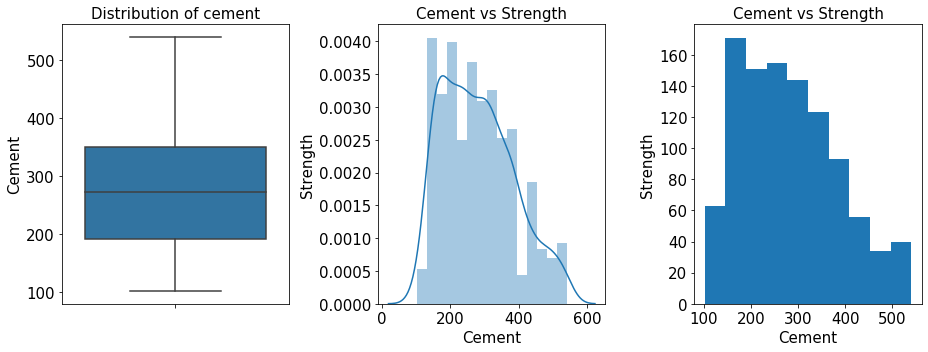

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Slag

In [15]:
rangeOfValues('slag')
centralValues('slag')
quartile('slag')

Range of values:  359.4
Minimum age:  0.0
Maximum age:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


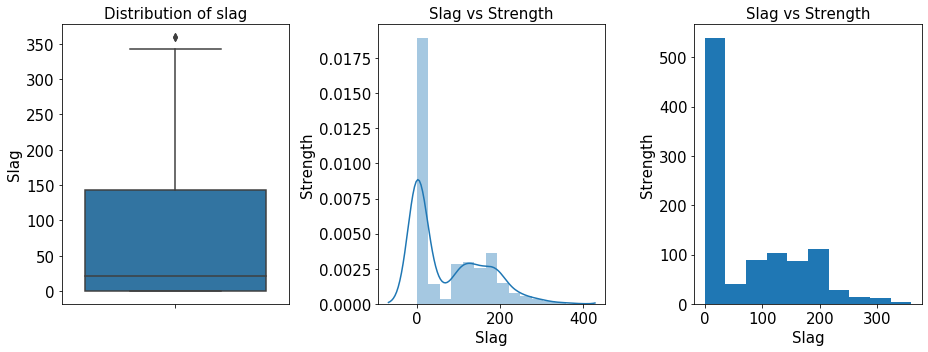

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Ash

In [17]:
rangeOfValues('ash')
centralValues('ash')
quartile('ash')

Range of values:  200.1
Minimum age:  0.0
Maximum age:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


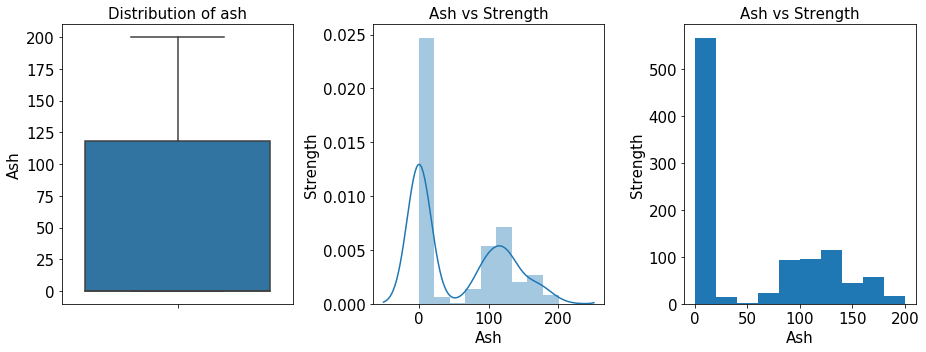

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Water

In [19]:
rangeOfValues('water')
centralValues('water')
quartile('water')

Range of values:  125.2
Minimum age:  121.8
Maximum age:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


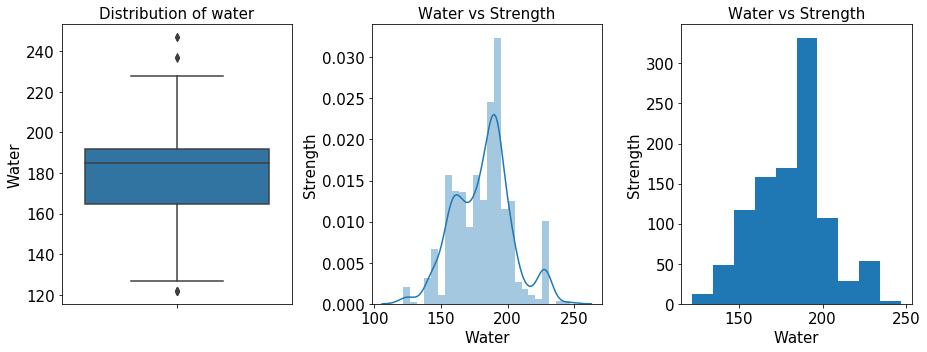

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Superplastic

In [21]:
rangeOfValues('superplastic')
centralValues('superplastic')
quartile('superplastic')

Range of values:  32.2
Minimum age:  0.0
Maximum age:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


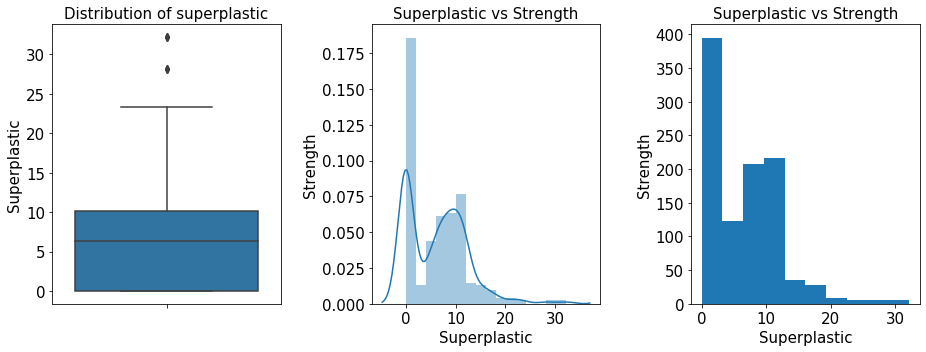

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Coarseagg

In [23]:
rangeOfValues('coarseagg')
centralValues('coarseagg')
quartile('coarseagg')

Range of values:  344.0
Minimum age:  801.0
Maximum age:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


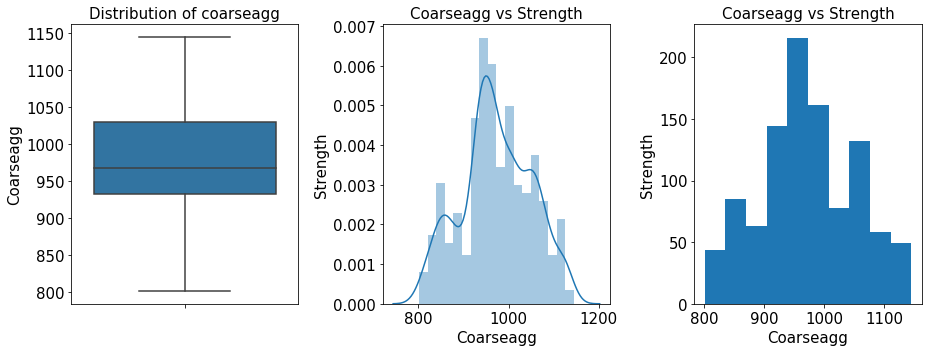

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Fineagg

In [25]:
rangeOfValues('fineagg')
centralValues('fineagg')
quartile('fineagg')

Range of values:  398.6
Minimum age:  594.0
Maximum age:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


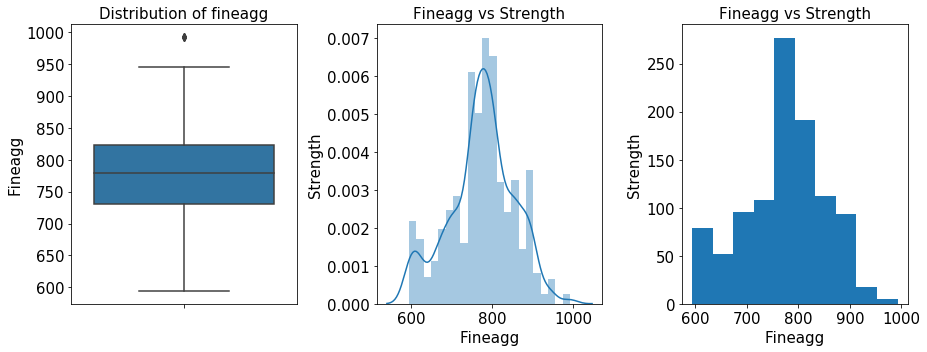

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Age

In [27]:
rangeOfValues('age')
centralValues('age')
quartile('age')

Range of values:  364
Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


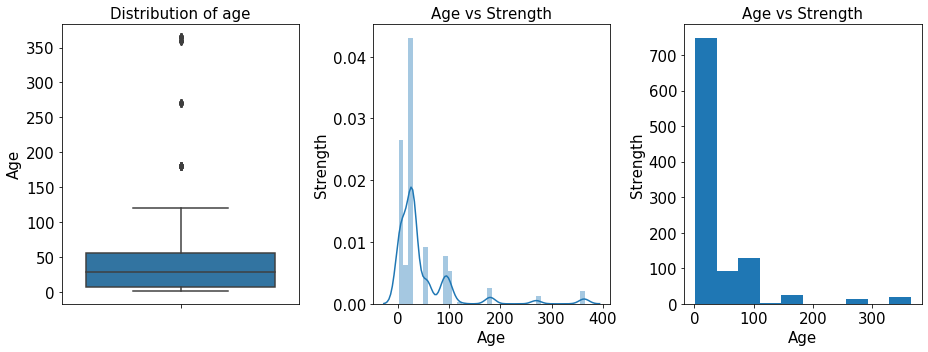

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## b. Multivariate analysis

### i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots,histograms or density curves. Select the most appropriate attributes

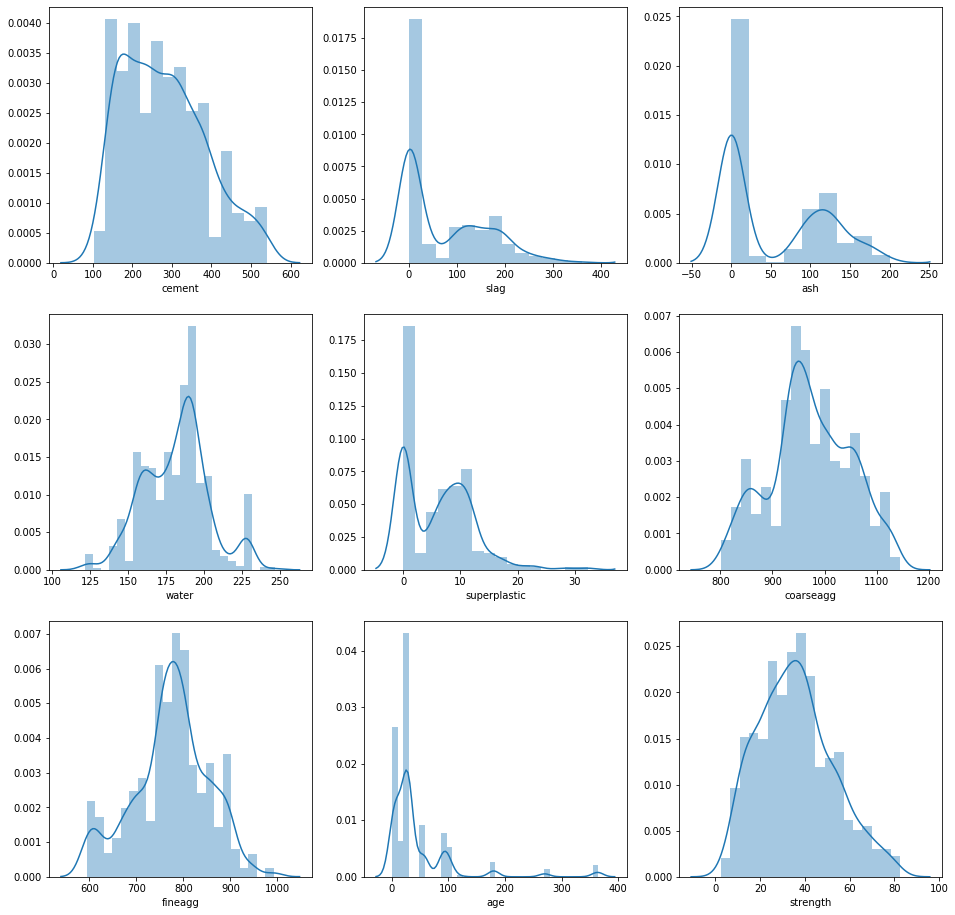

In [29]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2])

Below are the observations:
- cement is almost normally distributed. 
- slag has three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normally distributed.
- fineagg has almost two guassians and looks like normally distributed.
- age has multiple guassians and rightly skewed.
- target column - strength is almost normally distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2EEAA02C8>,
      dtype=object)

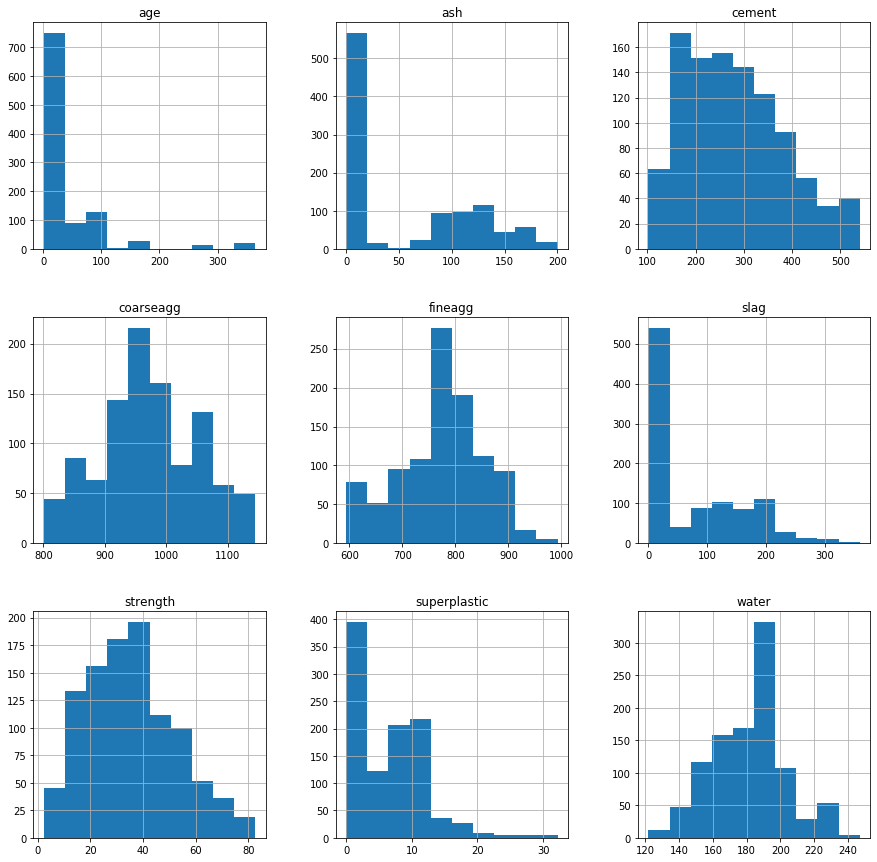

In [30]:
# Histogram 
concrete_df.hist(figsize=(15,15))

* The observations are same as dist plot

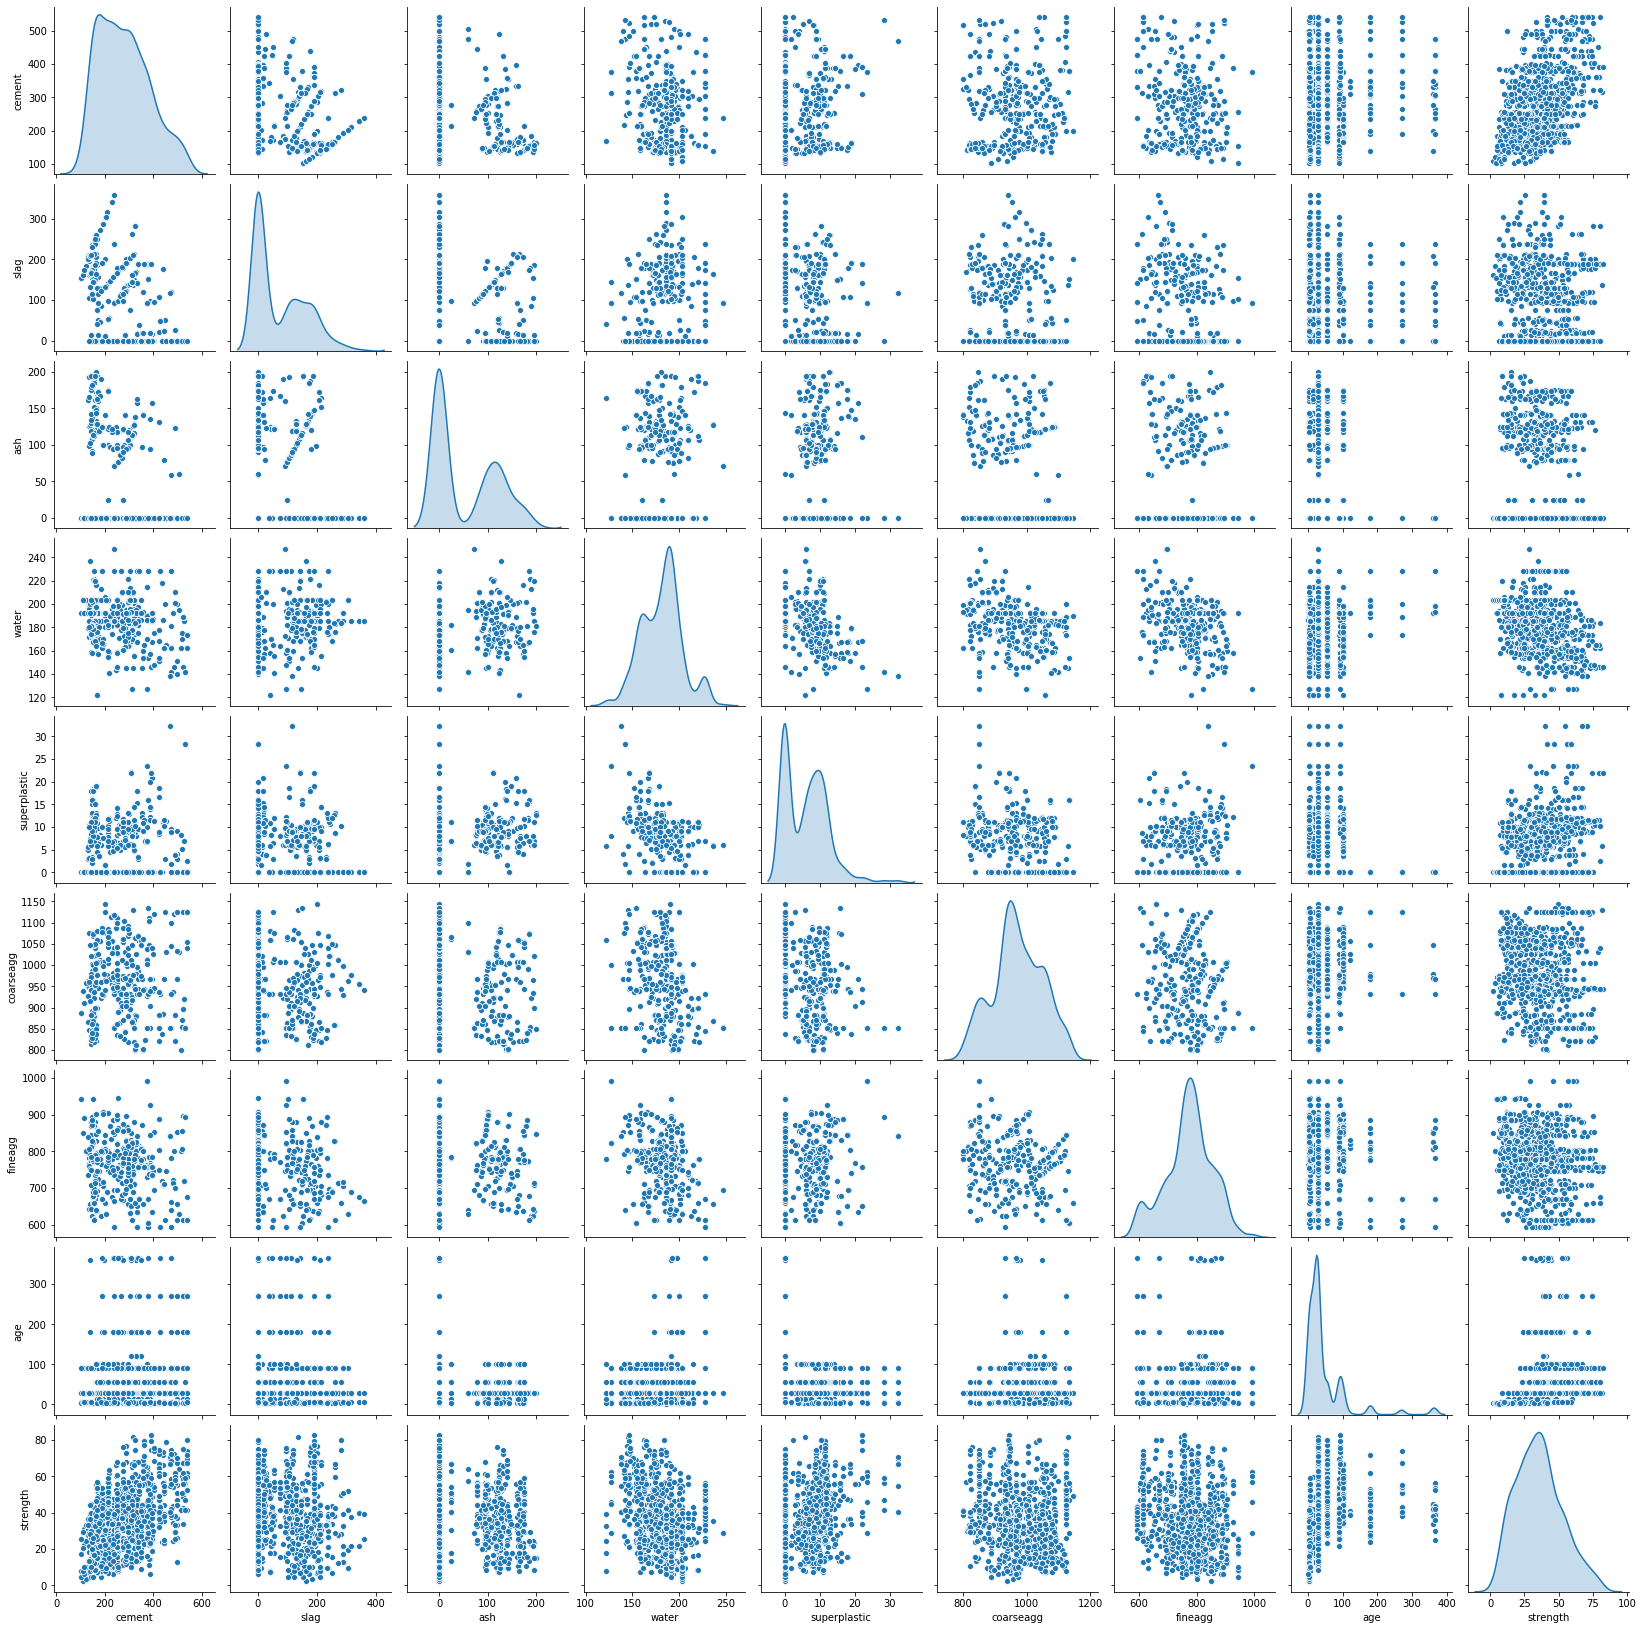

In [31]:
# pairplot- plot density
sns.pairplot(concrete_df, diag_kind='kde') 

#### Diagonals Analysis
- There are atleast 5 clusters hidden as the max number of Guassians = 5 which is for 'age' column

#### Relationship between indpendent attributes
- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

#### strength attribute : Relationship between dependent and independent attributes
strength: Now lets's compare the target column with all other independent attributes and it may show us very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs slag: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.


In [32]:
# corrlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


* Here, we can see the correlation value between the attributes.

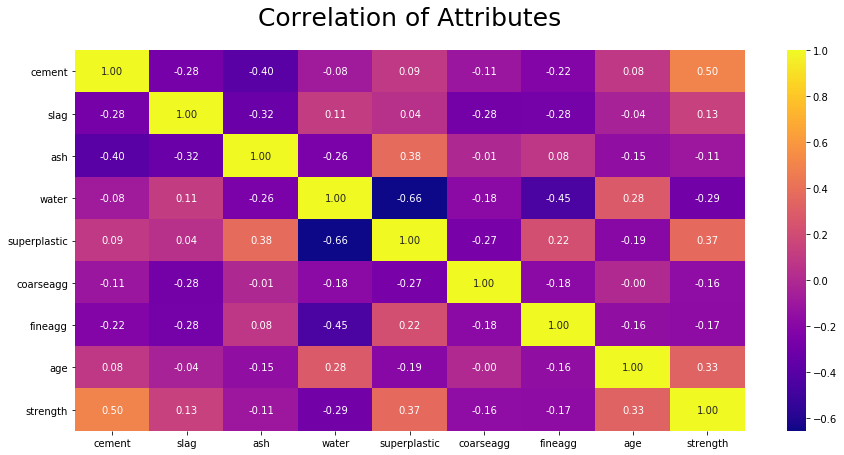

In [33]:
#Heatmap
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=25)
sns.heatmap(concrete_df.corr(), cmap='plasma',annot=True, fmt='.2f')

* It is also giving the same information we observed in pairplot analysis. 
* water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.


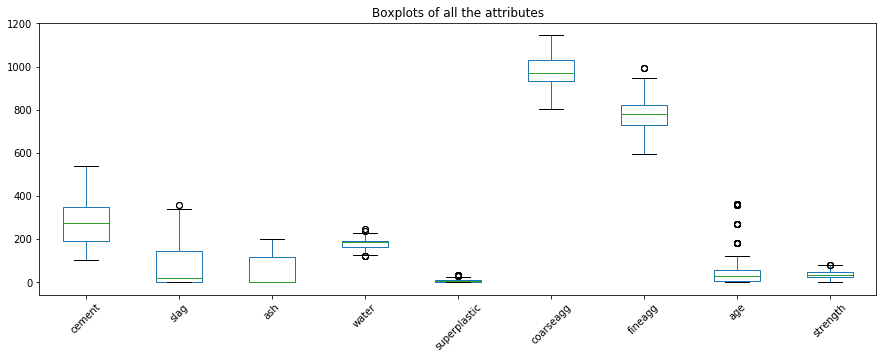

In [34]:
#Box plot 
#styling figures
#concrete_df.boxplot(figsize=(20,10))
pd.concat([concrete_df], axis = 0).plot(kind = 'box', rot=45, figsize=(15,5), title = 'Boxplots of all the attributes')
plt.show()

## c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

**Checking for missing values**

In [35]:
#Checking for missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* We can see that there are no missing values.

**Checking for outliers**

In [36]:
#Creating copy of original dataset
concrete_copy=concrete_df.copy()

In [37]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_copy[((concrete_copy.cement - concrete_copy.cement.mean()) / concrete_copy.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_copy[((concrete_copy.slag - concrete_copy.slag.mean()) / concrete_copy.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_copy[((concrete_copy.ash - concrete_copy.ash.mean()) / concrete_copy.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_copy[((concrete_copy.water - concrete_copy.water.mean()) / concrete_copy.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_copy[((concrete_copy.superplastic - concrete_copy.superplastic.mean()) / concrete_copy.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_copy[((concrete_copy.coarseagg - concrete_copy.coarseagg.mean()) / concrete_copy.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_copy[((concrete_copy.fineagg - concrete_copy.fineagg.mean()) / concrete_copy.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_copy[((concrete_copy.age - concrete_copy.age.mean()) / concrete_copy.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


* Here, we have used Standard deviation method to detect the outliers. If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
* We can see that slag, water, superplastic and age contain outliers.

In [38]:
#Python function to remove outliers
def removeOutiers(columnName):
    print('Records containing outliers in', columnName, ':')
    print(concrete_df[((concrete_df[columnName] - concrete_df[columnName].mean()) / concrete_df[columnName].std()).abs() >3][columnName]) 

In [39]:
#Records which contains the outliers in slag attribute
removeOutiers('slag')

Records containing outliers in slag :
21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [40]:
#Records which contains the outliers in water attribute
removeOutiers('water')

Records containing outliers in water :
66     247.0
263    246.9
Name: water, dtype: float64


In [41]:
#Records which contains the outliers in superplastic attribute
removeOutiers('superplastic')

Records containing outliers in superplastic :
44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [42]:
#Records which contains the outliers in age attribute
removeOutiers('age')

Records containing outliers in age :
64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


**Handling the outliers**

In [43]:
#Replacing the outliers by median
for col_name in concrete_copy.columns[:-1]:
    q1 = concrete_copy[col_name].quantile(0.25)
    q3 = concrete_copy[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_copy.loc[(concrete_copy[col_name] < low) | (concrete_copy[col_name] > high), col_name] = concrete_copy[col_name].median()

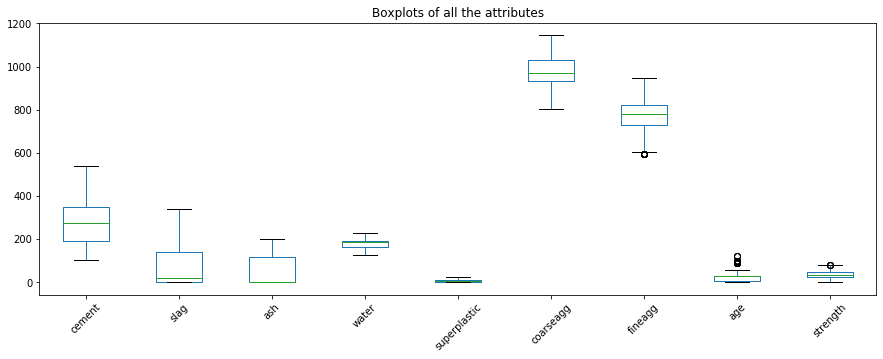

In [44]:
# Again checking for outliers in dataset using boxplot
#concrete_copy.boxplot(figsize=(25,15))
pd.concat([concrete_copy], axis = 0).plot(kind = 'box', rot=45, figsize=(15,5), title = 'Boxplots of all the attributes')
plt.show()

Here, we have replaced the outliers with the median values, this has lead to new outliers, but that is within 2 standard deviations 

# 2. Deliverable -2 (Feature Engineering techniques)

## Splitting the data into independent and dependent attributes

In [46]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = concrete_copy.drop('strength', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = concrete_copy[['strength']]

### Scaling the features

In [47]:
#Scale the data before applying an algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

* Here, all the attributes are given the same scale(n kg in a m3 mixture unit) except the age attribute which is given in day. Hence, we are scaling the attributes. We are using zscore for scaling.

## a.Identify opportunities (if any) to create a composite feature, drop a feature etc

**Instead of dropping any variables, we will carry out PCA to create a composite feature and drop featues if any
From the correlation matrix, heatmap and pairplot, we do not find a strong correlation between any pair of independent variables so that we can form a linear equation. 
I do not find a strong reason to drop any column directly, based on inferences drawn from correlation matrix, heatmap and pairplot.
We will carry out PCA for further analysis**

**Let's create Principle Components out of the attributes**

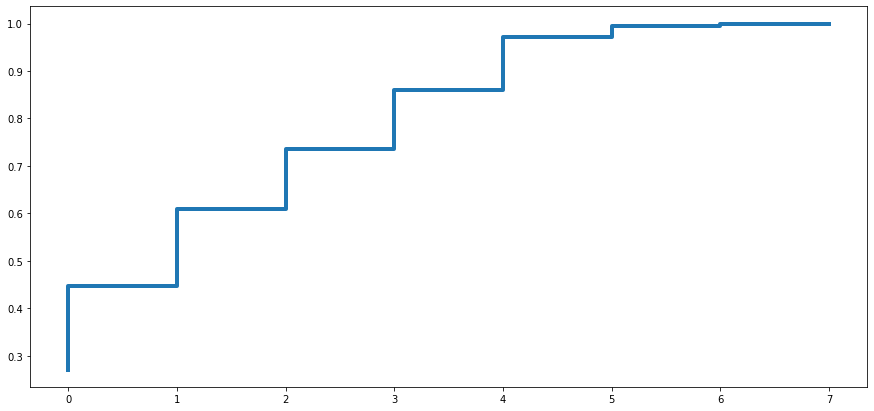

[0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602
 0.99461415 1.        ]


In [48]:
from sklearn.decomposition import PCA
pca = PCA().fit(XScaled)

cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize= (15,7))
plt.step(x = list(range(8)), y=cummulative_variance, linewidth = 4)
plt.show()
print(cummulative_variance)

**Dimensionality Reduction:** From the above step plot, its clearly evident that 7 dimensions seems very reasonable. With 7 variables we can explain over 98% of the variation in the original data

In [49]:
pca = PCA(.98)  # PCA object, which when fitted will generate principle components such that they capture 98% of the variance 

pca = pca.fit(XScaled)

X_pca = pca.transform(XScaled)
#X_val_pca = pca.transform(X_val)

In [50]:
print(f'''Total number of dimensions in the dataset: {XScaled.shape[1]}\n
Number of dimensions after PCA: {X_pca.shape[1]}\n
Dimensions reduced by {100*X_pca.shape[1]/XScaled.shape[1]}%''')

Total number of dimensions in the dataset: 8

Number of dimensions after PCA: 7

Dimensions reduced by 87.5%


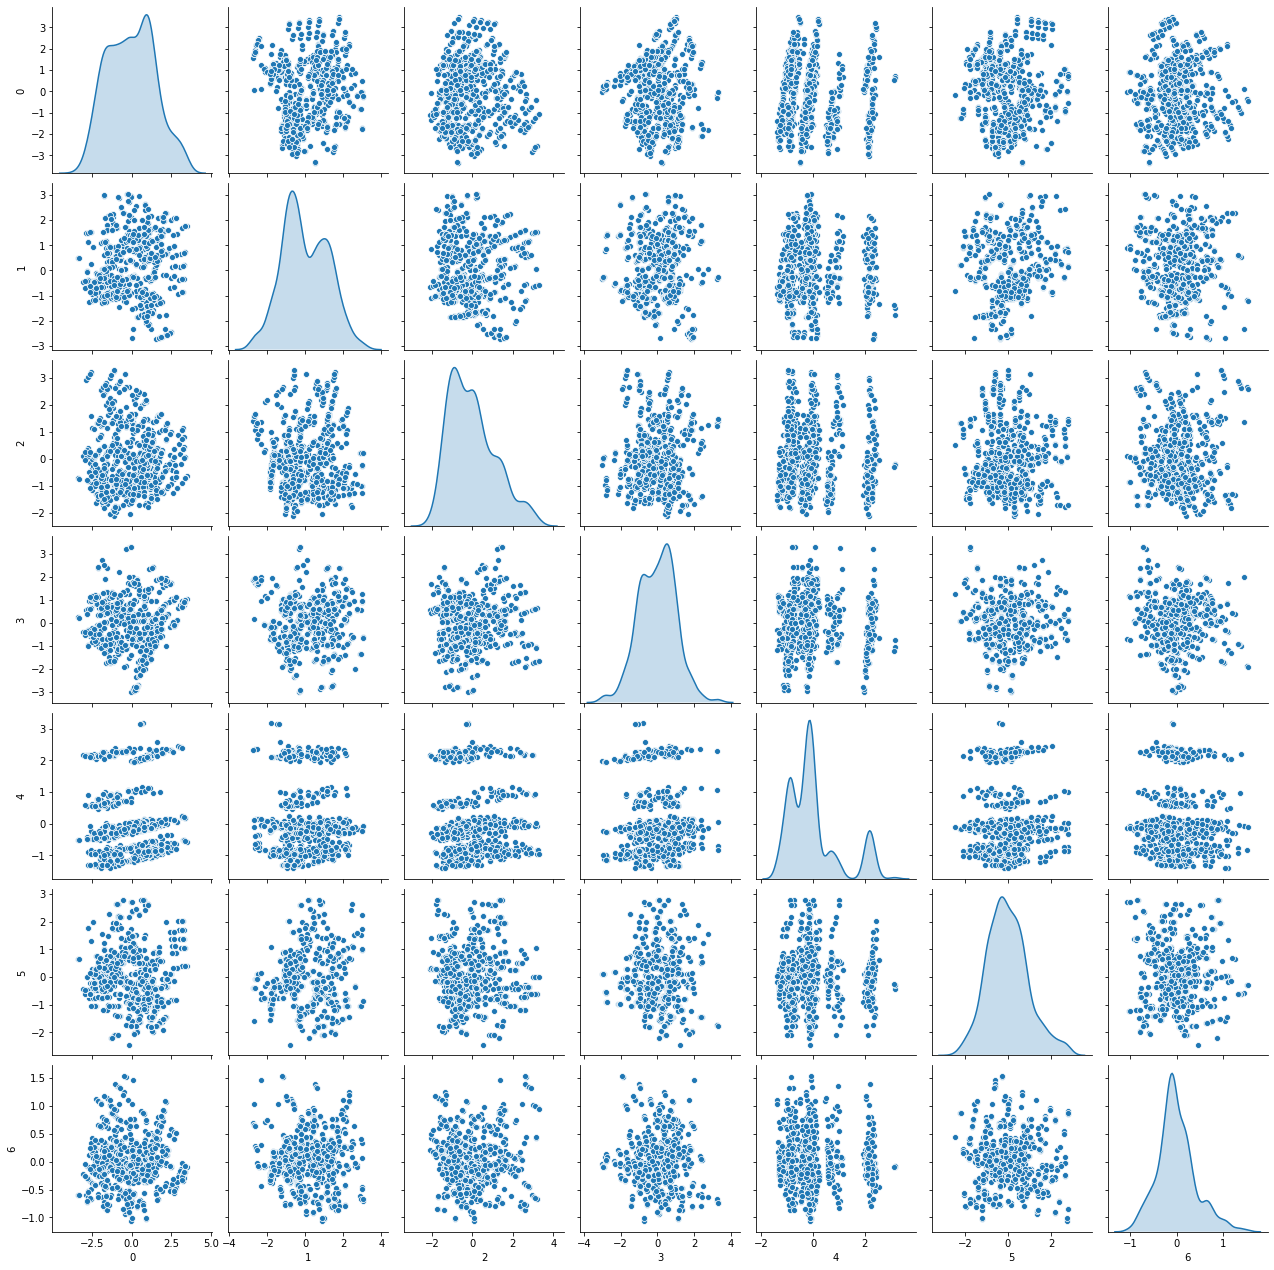

In [51]:
# Pairplot after dimensionality reduction
sns.pairplot(pd.DataFrame(X_pca),diag_kind='kde')

* The no. of Guassians are likely to be close to 4, as seen from column 4
* The PCA is also not very effective here, using the originial XScaled data for further analysis

## b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

## Splitting the data into training and testing sets

In [52]:
#Import Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = .30, random_state=1)

In [53]:
#Test with a Linear Regression model, if we are able to achieve the best fit line which passes through all points
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# model evaluation for training set
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 8.728487115076538
R2 score is 0.7214971210103257


The model performance for testing set
--------------------------------------
RMSE is 9.373032440596536
R2 score is 0.6981381588376173


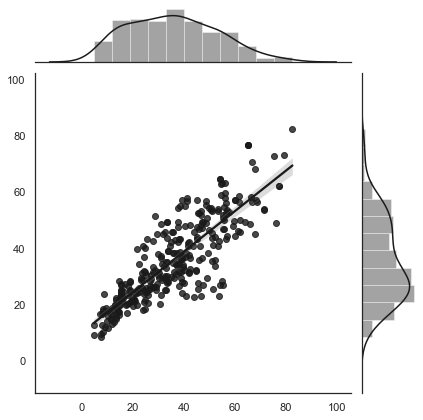

In [56]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_test_predict, kind="reg", color="k");

### Create a regularized RIDGE model and note the coefficients

In [57]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[10.53468061  5.52007243  2.07460837 -3.43964621  1.77305532 -0.62010592
  -0.85672176  8.66346657]]


### Create a regularized LASSO model and note the coefficients

In [58]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [10.16877328  5.16657349  1.64852458 -3.31673842  1.96876593 -0.60043956
 -0.86733498  8.54657321]


### Let us compare their scores

In [59]:
print(lin_model.score(X_train, y_train))
print(lin_model.score(X_test, y_test))

0.7214971210103257
0.6981381588376173


In [60]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7214963384533164
0.6981363872107984


In [61]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7210445116403564
0.6962936585461588


* More or less similar results but with less complex models.
* Note - with Lasso, we get decreased result in test and training.  But, the number of dimensions is much less in LASSO model than ridge or un-regularized model
* The low score is due to the large spread and apparent mix of gaussians
* Let's try to improve it further

### Polynomial Regression with degree 2 and higher and then test on the validation set

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [63]:
X_poly = poly.fit_transform(XScaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [64]:
# Fit a simple non regularized linear model on poly features
lin_model.fit(X_train, y_train)
print(lin_model.coef_[0])

[ 1.79051105e-16  1.18714724e+01  7.94972460e+00  2.76522432e+00
 -2.96714912e+00  2.03807761e+00  1.29143708e-01  4.83703781e-01
  8.60548737e+00  1.48734905e+00  1.09821798e+00 -3.23629292e+00
 -3.12557191e+00  1.40881993e+00  6.62376989e-01  1.56155379e+00
  1.49791216e+00 -1.51864820e+00 -1.14765665e+00  1.61699523e+00
  1.87439216e+00  2.60362490e+00 -4.63691595e+00 -4.61140343e+00
  2.82526655e-01  2.79756279e-01  2.03829155e+00  8.94152702e-01
 -2.52069922e+00 -7.59488555e-01 -4.56072551e-01 -9.46167159e-01
 -3.15114734e-01 -2.43820518e-01  1.84117864e+00  3.46940192e-01
  4.28803605e-01]


In [65]:
print(lin_model.score(X_train, y_train))
print(lin_model.score(X_test, y_test))

0.7839428342452036
0.7590619406039987


### Create a regularized RIDGE model and note the coefficients

In [66]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         11.79472268  7.86677601  2.70625339 -3.01697069  2.03496261
   0.08334279  0.42151011  8.60728557  1.46633704  1.08643456 -3.19761387
  -3.05776663  1.40265781  0.65882736  1.52882495  1.47654152 -1.49233143
  -1.08832024  1.60565882  1.8657844   2.57239165 -4.58662446 -4.55205811
   0.28255103  0.28638265  2.0091601   0.91777843 -2.50331124 -0.75113413
  -0.47465268 -0.9125119  -0.27469282 -0.24239185  1.83590491  0.33014181
   0.40203075]]


In [67]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7839383951205366
0.7589837444210669


### Create a regularized LASSO model and note the coefficients

In [68]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         11.56957038  7.58522488  2.49840192 -3.14399965  2.02696193
 -0.03811722  0.24500934  8.65868884  1.33702003  0.92101103 -2.96382506
 -2.64862846  1.3228973   0.61495999  1.18119367  1.27305941 -1.25670604
 -0.67784369  1.54095994  1.83732998  2.2343391  -4.33079645 -4.18997933
  0.17423825  0.23671411  1.71968495  1.02815452 -2.37041257 -0.6538298
 -0.64097582 -0.63140059  0.         -0.18194035  1.82818107  0.1162413
  0.10532551]


In [69]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7837330305718143
0.7572299898449377


**The accuracy score on training and test has improved with degree 2 and there is less overfit**  

In [70]:
#Degree 3
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(XScaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 93)

In [71]:
# Fit a simple non regularized linear model on poly features
lin_model.fit(X_train, y_train)
print(lin_model.coef_[0])

[ 1.18002645e-16  1.35129755e+01  8.05217725e+00  4.26857355e+00
 -1.86091471e+00  1.91645947e+00  1.25161740e+00  2.77542660e+00
  8.38006143e+00 -7.39712867e-01  7.08225261e-01 -5.22920237e-02
  1.95528121e+00  9.33378268e-01  2.37607363e+00  1.27797418e+00
  1.67476748e+00 -2.31342708e+00 -6.01989714e-01 -4.05129600e-01
  1.50856967e+00  2.22865419e+00 -1.97154406e+00 -3.13640170e+00
 -9.58031700e-01  6.01662847e-01  2.16967690e+00  1.31544190e+00
 -4.41402964e+00 -5.45917273e-01 -2.18389667e+00  5.08373147e-01
  2.00729301e+00 -5.49340811e-01  1.52088122e+00  2.91791281e-02
 -3.23339858e-01 -1.98956667e-01  1.06977789e+00 -4.31026250e-01
 -1.86856469e+00  6.72014327e-01 -7.24688652e-01  2.02126728e+00
 -1.11840259e+00 -1.07978144e+00  1.16409911e+00  7.46072313e-01
  3.46462607e+00  3.04057096e+00  1.87543813e+00  1.88748254e+00
  2.19628883e+00  1.06952548e+00  1.91918687e+00  1.43606988e-01
 -2.88459665e-02  2.02446413e-01  8.32482619e-01 -2.43779483e+00
  8.43714031e-01  2.28167

In [72]:
print(lin_model.score(X_train, y_train))
print(lin_model.score(X_test, y_test))

0.830353575992276
0.7774722902814609


As the degree increases, the overfit increases, model performs well on training, but poor on test data

**As we can see as the degree increases, the overfit increases, the accuracy of the test data decreases, the quadratic degree gives a better fit in terms of training and testing accuracy.**
- Training accuracy with degree 2 = 78.37%
- Testing accuracy with degree 2 = 75.72%

**Comment :** From the above we see the Ridge - with 2d Polynomial features scores the best with lowest RMSE and High R Squared values. So let's check the Random Forest Regressor model in details.

Let us explore the data for hidden clusters

## c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

## K Means Clustering

In [73]:
#importing kmeans clustering library
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )  
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(concrete_copy)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141117e+07
3,4,1.868494e+07
4,5,1.673076e+07
5,6,1.469469e+07
6,7,1.343401e+07
7,8,1.235322e+07
8,9,1.157011e+07


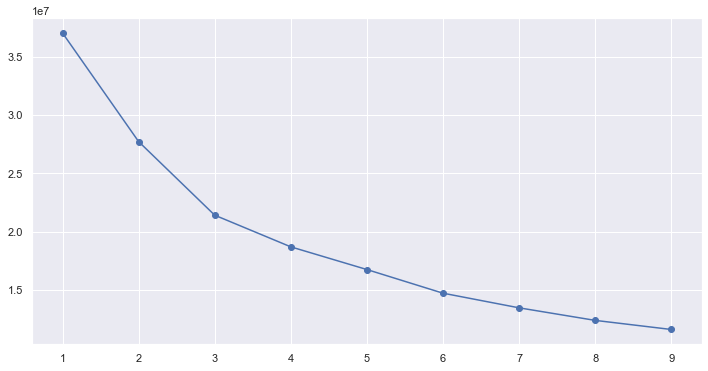

In [74]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

* The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
* Let us start with 3 clusters

In [75]:
# k=3
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(concrete_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [76]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_copy)
concrete_copy["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_copy_z = concrete_copy.copy(deep = True)  

In [77]:
centroids = cluster.cluster_centers_
centroids

array([[ 225.43850575,   11.32471264,  101.04626437,  174.68591954,
           6.95948276, 1016.24827586,  814.8091954 ,   36.1637931 ,
          29.62847701],
       [ 224.20994318,  174.48465909,   33.884375  ,  187.91505682,
           5.32017045,  943.28835227,  747.18636364,   30.20454545,
          35.58485795],
       [ 400.69212121,   30.54030303,   26.43212121,  182.32090909,
           5.63090909,  958.83212121,  755.02787879,   30.32424242,
          42.59369697]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2FA4D3D08>,
      dtype=object)

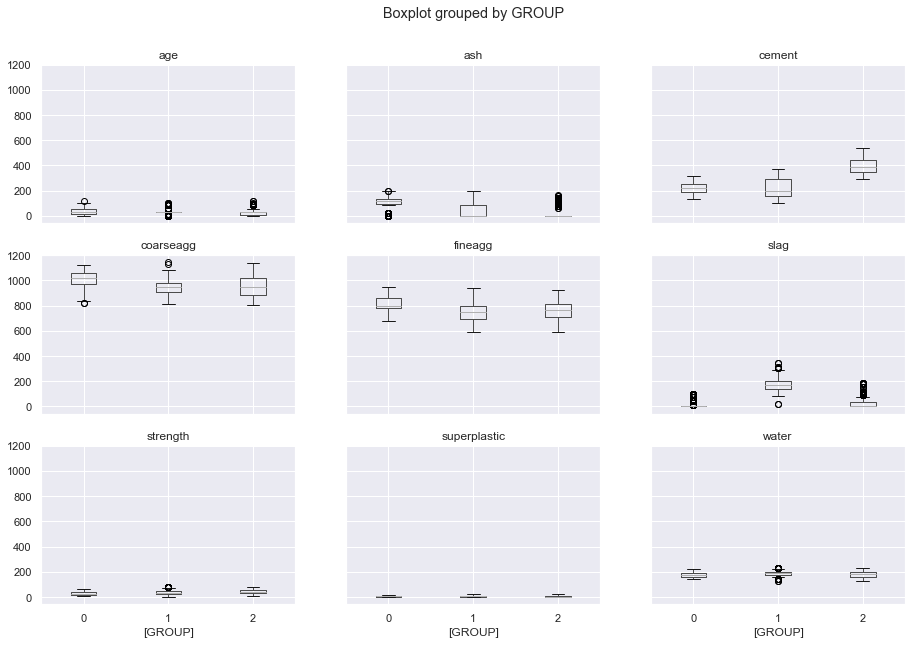

In [78]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
concrete_copy_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

**None of the dimensions are good predictor of target variable**

In [79]:
#Repeating for k =4
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(concrete_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [80]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_copy)
concrete_copy["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_copy_z = concrete_copy.copy(deep = True)  

In [81]:
centroids = cluster.cluster_centers_
centroids

array([[2.25593043e+02, 1.12492754e+01, 9.96698551e+01, 1.74860870e+02,
        6.96753623e+00, 1.01652899e+03, 8.15896812e+02, 3.64173913e+01,
        2.97093913e+01, 9.27536232e-02],
       [3.93056863e+02, 1.83151961e+01, 1.04392157e+01, 1.92933824e+02,
        2.02794118e+00, 1.01217010e+03, 7.09152941e+02, 2.98529412e+01,
        3.85618137e+01, 1.86764706e+00],
       [3.77682039e+02, 9.14145631e+01, 4.16422330e+01, 1.69639320e+02,
        1.03572816e+01, 8.87361650e+02, 8.01378155e+02, 3.12087379e+01,
        4.95048058e+01, 1.57281553e+00],
       [1.95589818e+02, 1.78142545e+02, 3.89818182e+01, 1.90805455e+02,
        4.36981818e+00, 9.53181091e+02, 7.43588727e+02, 2.96036364e+01,
        3.11933091e+01, 1.00000000e+00]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2FA4D3EC8>,
      dtype=object)

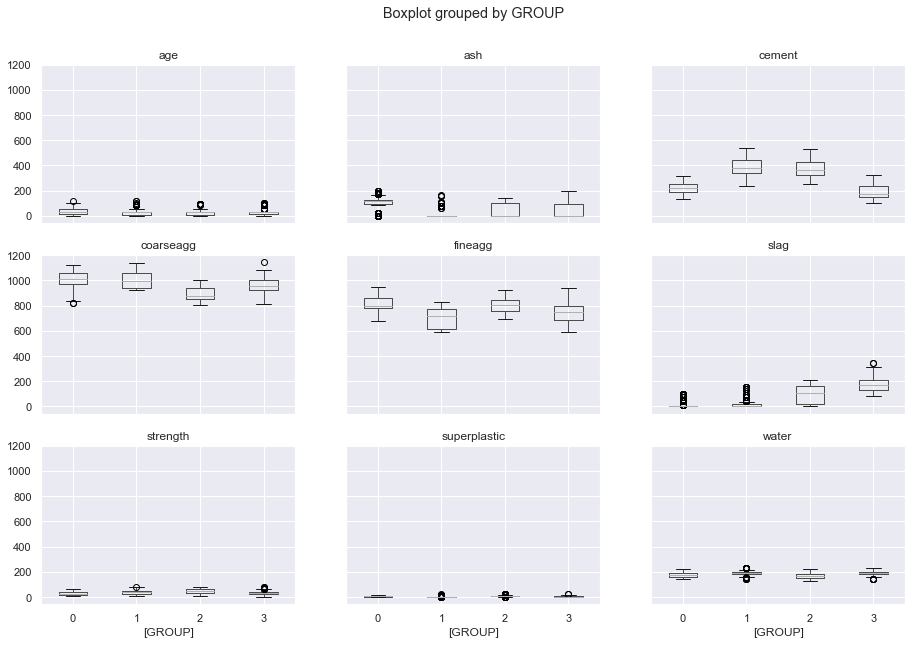

In [82]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
concrete_copy_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

* Here, None of the dimensions are good predictor of target variable.
* For all the dimensions (variables) every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

## Deliverable - 3 & 4 (Create and Tune the model )

### --> DecisionTree Regression

In [83]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = .30, random_state=1)

In [84]:
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [85]:
feature_importances = pd.DataFrame(dt_model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cement,0.352121
age,0.328899
water,0.126593
slag,0.094433
coarseagg,0.036686
fineagg,0.030275
superplastic,0.017456
ash,0.013535


* So, cement, age and slag and water are significant attributes.
* Here, ash, coarseagg, fineagg and superplastic are the less significant variable. These will impact less to the strength column. This we have also seen in pairplot 

In [86]:
#Import the metrics
from sklearn import metrics
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
acc_train_DT = dt_model.score(X_train,y_train)
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907420889983
Performance on testing data using DT: 0.8546513614736382
Accuracy DT:  0.8546513614736382
MSE:  42.30220365875584


* There is a overfitting in the model as the dataset is performing 99% accurately in training data. However, the accuracy on test data drops drastically.
* This cannot be considered as a good model

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy_train': acc_train_DT, 'accuracy_test': acc_test_DT},index={'1'})
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651


### K-Fold cross validation on Decision Tree

In [89]:
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt_model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8565348945973371
Standard Deviation:  0.04426978175150984


In [90]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree K fold'], 'accuracy_train': [accuracy], 'accuracy_test': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535


### Iteration 2 - Drop the least significant variable

In [91]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [92]:
#Create a copy of the dataset
concrete_df2=concrete_df.copy()

In [93]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg', 'superplastic'] , axis=1)
y = concrete_df2['strength']
#Scale the data
XScaled = scaler.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 1)

In [94]:
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [95]:
feature_importances = pd.DataFrame(dt_model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cement,0.390255
age,0.336895
water,0.156271
slag,0.116579


In [96]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
acc_train_DT=dt_model.score(X_train,y_train)
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_DT)

Performance on training data using DT: 0.9934594342873229
Performance on testing data using DT: 0.8522841536409613
Accuracy DT:  0.8522841536409614


The accuracy on testing dataset is not improved, still it is an overfit model.

In [97]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy_train': acc_train_DT, 'accuracy_test': acc_test_DT},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284


### --> Regularising/Pruning of Decision Tree

In [100]:
#independent and dependent variables
X = concrete_df.iloc[:,0:8]
y = concrete_df.iloc[:,8]
XScaled = scaler.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 1)

In [101]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [102]:
feature_importances = pd.DataFrame(reg_dt_model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cement,0.418362
age,0.397658
water,0.132203
slag,0.025910
superplastic,0.018048
fineagg,0.007819
ash,0.000000
coarseagg,0.000000


* Here, we can see that ash,coarseagg and fineagg are least significant variable.

### Visualizing the Regularized Tree

In [103]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
concrete_df_copy=concrete_df
xvar = concrete_df_copy.drop('strength', axis=1)
feature_cols = xvar.columns

C:\Users\I329971\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


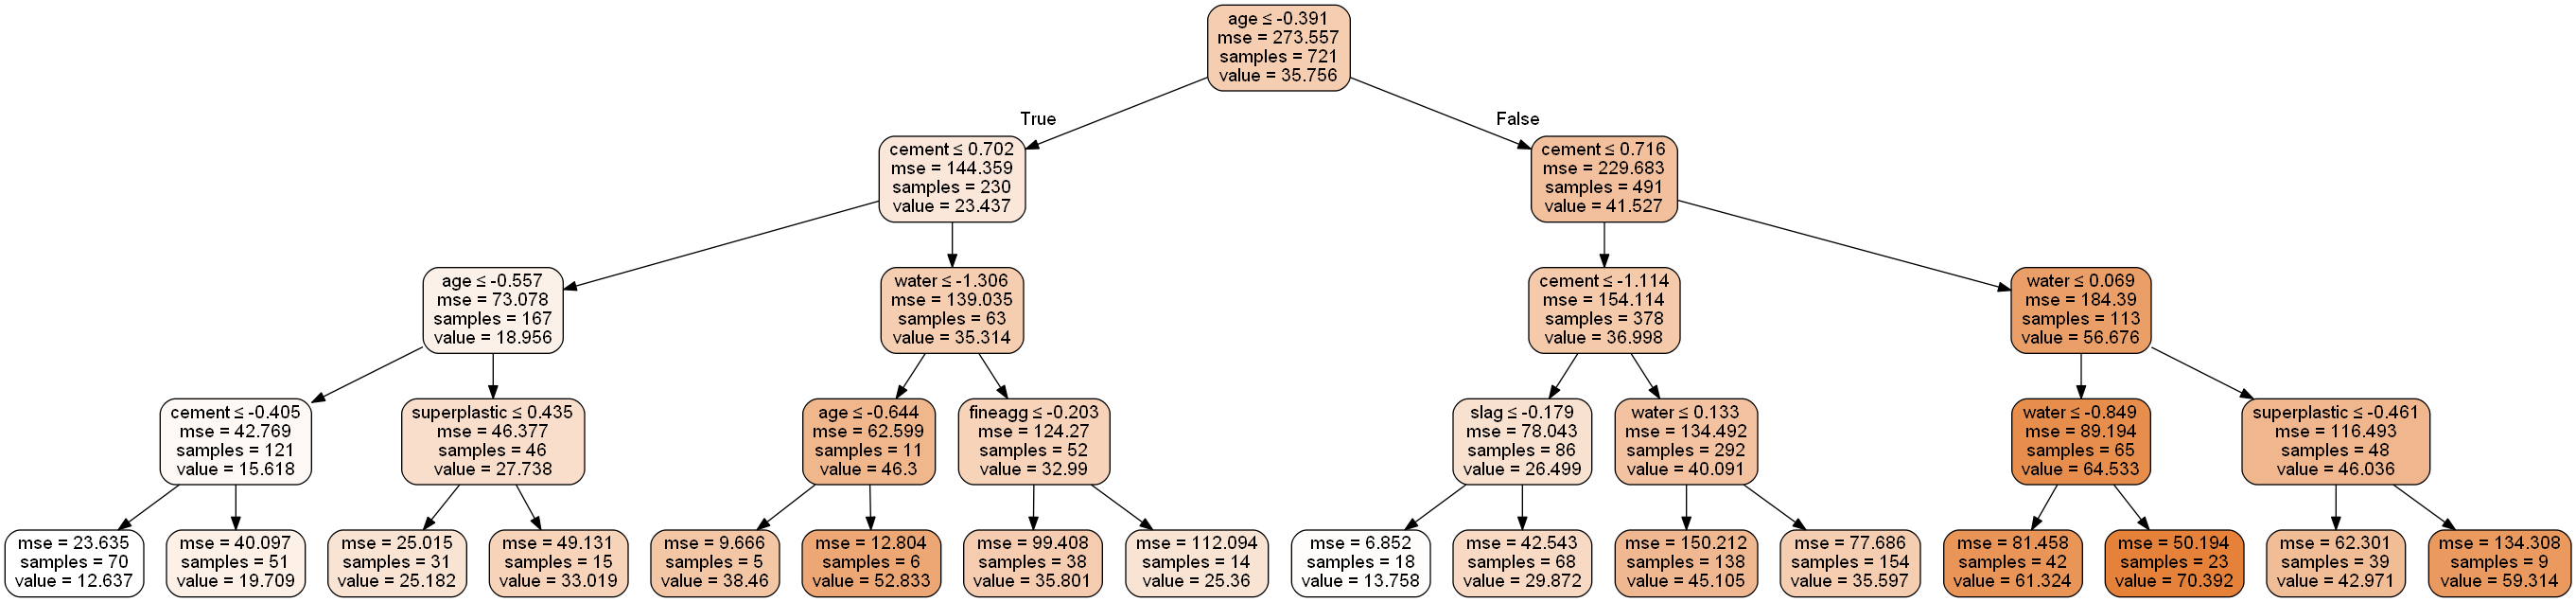

In [104]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [105]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
acc_train_RDT = reg_dt_model.score(X_train,y_train)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7231360843074616
Performance on testing data using DT: 0.654609695724557
Accuracy DT:  0.654609695724557
MSE:  100.5222418410854


In [106]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy_train': acc_train_RDT, 'accuracy_test': acc_test_RDT},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610


### K-Fold cross validation on Pruned Decision Tree

In [107]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(reg_dt_model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6698433706691584
Standard Deviation:  0.07560441458999559


In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843


### Iteration2 - Drop the least significant variable

In [109]:
#Create a copy of the dataset
concrete_df2=concrete_df.copy()

In [110]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
#Scale the data
XScaled = scaler.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled,y, test_size = 0.3, random_state = 1)

In [111]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [112]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
acc_train_RDT=reg_dt_model.score(X_train,y_train)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7225133406860064
Performance on testing data using DT: 0.6632496804899377
Accuracy DT:  0.6632496804899377
MSE:  98.00766448515512


In [113]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy_train': acc_train_RDT, 'accuracy_test': acc_test_RDT},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250


### --> Random Forest Regressor

In [114]:
#independent and dependent variables
X = concrete_df.iloc[:,0:8]
y = concrete_df.iloc[:,8]
#Scale the data
XScaled = scaler.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 1)

In [115]:
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
rf_model=RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [116]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.348803
cement,0.319133
water,0.118590
slag,0.068730
superplastic,0.054059
fineagg,0.038940
coarseagg,0.027077
ash,0.024668


* Again we see that fineagg, courseagg and ash are the least significant. So dropping these variables. 
* Hereafter, we will carry out building the model using different algorithms with most significant variables

In [118]:
#Create a copy of the dataset
concrete_df2=concrete_df.copy()
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
#Scale the data
XScaled = scaler.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 1)

In [119]:
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
rf_model=RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [120]:
y_pred = rf_model.predict(X_test)
# performance on train data
acc_train_RFR=rf_model.score(X_train,y_train)
print('Performance on training data using RFR:',rf_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',rf_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9813761779367287
Performance on testing data using RFR: 0.9085655159091115
Accuracy DT:  0.9085655159091115
MSE:  26.611051927703635


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy_train': acc_train_RFR, 'accuracy_test': acc_test_RFR},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566


### K-Fold cross validation on Random Forest Regressor

In [122]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
results1 = cross_val_score(rf_model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9082922887792668
Standard Deviation:  0.021745865998154493


In [123]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292


### --> Gradient Boosting Regressor

In [124]:
gb_model=GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
y_pred = gb_model.predict(X_test)
# performance on train data
acc_train_GBR=gb_model.score(X_train,y_train)
print('Performance on training data using GBR:',gb_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',gb_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.942467836316665
Performance on testing data using GBR: 0.8896324498731122
Accuracy DT:  0.8896324498731122
MSE:  32.12132311744204


In [126]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 'accuracy_train': acc_train_GBR, 'accuracy_test': acc_test_GBR},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632


### K fold cross validation on Gradient Boost Regressor

In [127]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(gb_model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8939004333139662
Standard Deviation:  0.021387193022136583


In [128]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### --> Ada Boosting Regressor

In [129]:
ab_model=AdaBoostRegressor(random_state=1)
ab_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [130]:
y_pred = ab_model.predict(X_test)
# performance on train data
acc_train_ABR=ab_model.score(X_train,y_train)
print('Performance on training data using GBR:',ab_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',ab_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.816611896435481
Performance on testing data using GBR: 0.762128212213298
Accuracy DT:  0.762128212213298
MSE:  69.23010021728133


In [131]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy_train': acc_train_ABR, 'accuracy_test': acc_test_ABR},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### K fold cross validation on Ada Boosting Regressor

In [132]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(ab_model, XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7765083029564604
Standard Deviation:  0.03222660639231498


In [133]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### --> Bagging Regressor

In [134]:
bag_model=BaggingRegressor(random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=1, verbose=0,
                 warm_start=False)

In [135]:
y_pred = bag_model.predict(X_test)
# performance on train data
acc_train_BR=bag_model.score(X_train,y_train)
print('Performance on training data using GBR:',bag_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',bag_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_test_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.97691814226709
Performance on testing data using GBR: 0.8932293922890222
Accuracy DT:  0.8932293922890222
MSE:  31.074470582947594


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy_train': acc_train_BR, 'accuracy_test': acc_test_BR},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### K fold cross validation on Bagging Regressor

In [137]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(bag_model, XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8938676224170428
Standard Deviation:  0.026569409256160158


In [139]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### --> KNN Regressor

In [140]:
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

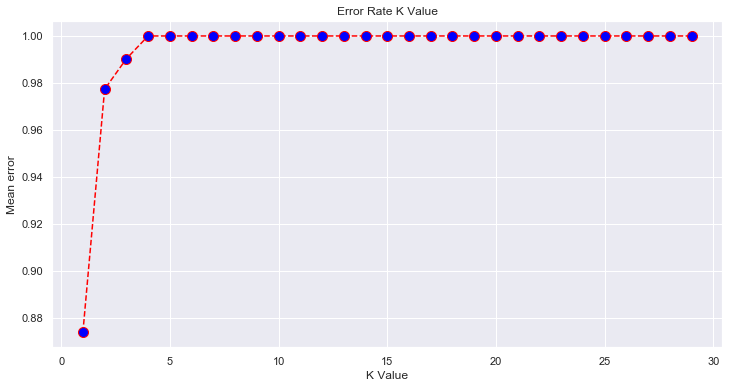

In [141]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [142]:
#k=3
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [143]:
y_pred = knn_model.predict(X_test)
# performance on train data
acc_train_KNN=knn_model.score(X_train,y_train)
print('Performance on training data using KNNR:',knn_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',knn_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_KNN=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_test_KNN)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8894381524240688
Performance on testing data using KNNR: 0.7805569331169713
Accuracy KNNR:  0.7805569331169713
MSE:  63.86661341244157


In [144]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy_train': acc_train_KNN, 'accuracy_test': acc_test_KNN},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### K-Fold cross validation on KNN Regressor

In [145]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(knn_model, XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7805363893700623
Standard Deviation:  0.04096405523013099


In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor K fold'], 'accuracy_train': accuracy, 'accuracy_test': accuracy},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


### -->Support Vector Regressor

In [147]:
# Import support vector regressor machine learning library
from sklearn.svm import SVR
svc_model = SVR(kernel='linear')
svc_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [148]:
y_pred = svc_model.predict(X_test)
# performance on train data
acc_train_SVR=svc_model.score(X_train,y_train)
print('Performance on training data using SVR:',svc_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',svc_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_test_SVR=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_test_SVR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.5678281528499001
Performance on testing data using SVR: 0.5948216050793597
Accuracy SVR:  0.5948216050793597
MSE:  117.9229413762419


In [149]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy_train': acc_train_SVR, 'accuracy_test': acc_test_SVR},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_train', 'accuracy_test']]
results

,Method,accuracy_train,accuracy_test
1,Decision Tree,0.991791,0.854651
2,Decision Tree K fold,0.856535,0.856535
3,Decision Tree2,0.993459,0.852284
4,Pruned Decision Tree,0.723136,0.654610
5,Pruned Decision Tree K fold,0.669843,0.669843
6,Pruned Decision Tree2,0.722513,0.663250
7,Random Forest Regressor,0.981376,0.908566
8,Random Forest Regressor K fold,0.908292,0.908292
9,Gradient Boosting Regressor,0.942468,0.889632
10,Gradient Boost Regressor K fold,0.893900,0.893900


* Support Vector Regressor's R2 score is poor when compared to other algorithm's, hence not performing K-Fold validation usin SVR

**Conclusion:** Out of all the above algorithm's, **Random Forest Regressor** is having lowest Root Mean Square Error (RMSE) and Higest R Square value.
So, according to above analysis, we can conclude that Random Forest Regressor is the best model

### Model Tuning

#### Performing GridSearch and RandomizedSearch on RandomForestRegressor as from the above we saw that the accuracy score was better

In [154]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()

params = { 
            "n_estimators"      : [100],
            "max_depth":          [10, 20, 30, 40, 50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
         }

GSmodel = GridSearchCV(model, param_grid=params, cv = 10)

GSmodel.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{GSmodel.best_params_}")

Best Hyper Parameters:

{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [171]:
#Applying the above hyperparameters
model = RandomForestRegressor(bootstrap= False,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_split= 2,
 n_estimators= 100,
 random_state = 22)

In [172]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
results1 = cross_val_score(model,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9171203137595387
Standard Deviation:  0.022024138717275422


In [163]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

RandomCV = RandomizedSearchCV(estimator = model, param_distributions = params, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

RandomCV.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{RandomCV.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.1s finished


Best Hyper Parameters:

{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}


In [173]:
#Applying the above hyperparameters
model_randomCV = RandomForestRegressor(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_split= 2,
 n_estimators= 100,
 random_state = 22)

In [174]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
results1 = cross_val_score(model_randomCV,XScaled, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.909103644545182
Standard Deviation:  0.022348947815852647


### Model performance range at 95% confidence level

In [177]:
values = concrete_df.values

In [184]:
# Bootstrapping_Confidence_Level
# configure bootstrap
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


n_iterations = 100              # Number of bootstrap samples to create
n_size = int(len(values) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    rfTree = RandomForestRegressor(n_estimators=50)  
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)

    stats.append(score)


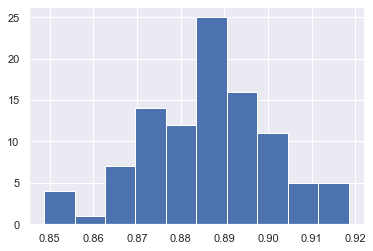

95.0 confidence interval 85.2% and 91.4%


In [186]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Conclusion ::-
From the above we have come to the conclusion that RandomForestRegressor is giving the good accuracy score.

**Key Points from the above analysis:**
1. There were no missing values in the dataset, original shape of the data is (1030, 9)
2. The outliers were identified and removed
3. From pairplot and correlation matrix we couldn't decide strongly on dropping a column, the pairplot also showed Guassian curvers
4. Using PCA did not help much, we dropped few columns after identifying feature importance
5. Linear Regression - The Ridge - with 2d Polynomial features scores the best with lowest RMSE and High R Squared values. So let's check the Random Forest Regressor model in details.
6. KMean Cluster didn't show good results
7. Out of DecisionTree, RandomForest, Bagging, Gradient and AdaBoosting, KNN and SVC - **RandomForestRegressor** had the best results
8. We made use of GridSearchCV and RandomizedSearchCV techniques to tune the hyperparameters
    